In [1]:
# tools
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from numpy import sqrt
from numpy import argmax
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from sklearn.metrics import plot_roc_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from pickle import load
import seaborn as sns
from numpy import mean
from numpy import std
from scipy.stats import percentileofscore

# version check
import sys
print("python version")
print(sys.version)
import sklearn
print("sklearn version = ", sklearn.__version__)
print("numpy version = ", np.__version__)
print("pandas version =", pd.__version__)

python version
3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
sklearn version =  0.23.2
numpy version =  1.19.2
pandas version = 1.2.3


In [2]:
# load models and scaler, sample data

## xgb models
model60 = joblib.load('ua60_model')
model45 = joblib.load('ua45_model')
model30 = joblib.load('ua30_model')
## scaler
scaler60 = joblib.load('scaler60.pkl')
scaler45 = joblib.load('scaler45.pkl')
scaler30 = joblib.load('scaler30.pkl')
## sample data
sample60_non = pd.read_csv('sample60_non.csv')
sample60_pro = pd.read_csv('sample60_pro.csv')
sample45_non = pd.read_csv('sample45_non.csv')
sample45_pro = pd.read_csv('sample45_pro.csv')
sample30_non = pd.read_csv('sample30_non.csv')
sample30_pro = pd.read_csv('sample30_pro.csv')

In [3]:
# standardization columns
std_cols=['age','he_uph','he_usg']

# sample60 non proteinuria
X_test60_non = sample60_non
X_test60_features_non = X_test60_non.loc[:, ['male', 'he_usg', 'he_uph', 'he_ubld', 'he_uglu', 'he_upro', 'age']]
std_60_non=X_test60_features_non[std_cols]
X_test60_features_non[std_cols]=scaler60.transform(std_60_non)
y_test60_non = sample60_non['eGFR_ab']
# sample60 proteinuria
X_test60_pro = sample60_pro
X_test60_features_pro = X_test60_pro.loc[:, ['male', 'he_usg', 'he_uph', 'he_ubld', 'he_uglu', 'he_upro', 'age']]
std_60_pro=X_test60_features_pro[std_cols]
X_test60_features_pro[std_cols]=scaler60.transform(std_60_pro)
y_test60_pro = sample60_pro['eGFR_ab']

# sample45 non proteinuria
X_test45_non = sample45_non
X_test45_features_non = X_test45_non.loc[:, ['male', 'he_usg', 'he_uph', 'he_ubld', 'he_uglu', 'he_upro', 'age']]
std_45_non=X_test45_features_non[std_cols]
X_test45_features_non[std_cols]=scaler45.transform(std_45_non)
y_test45_non = sample45_non['eGFR_ab45']
# sample45 proteinuria
X_test45_pro = sample45_pro
X_test45_features_pro = X_test45_pro.loc[:, ['male', 'he_usg', 'he_uph', 'he_ubld', 'he_uglu', 'he_upro', 'age']]
std_45_pro=X_test45_features_pro[std_cols]
X_test45_features_pro[std_cols]=scaler45.transform(std_45_pro)
y_test45_pro = sample45_pro['eGFR_ab45']

# sample30 non proteinuria
X_test30_non = sample30_non
X_test30_features_non = X_test30_non.loc[:, ['male', 'he_usg', 'he_uph', 'he_ubld', 'he_uglu', 'he_upro', 'age']]
std_30_non=X_test30_features_non[std_cols]
X_test30_features_non[std_cols]=scaler30.transform(std_30_non)
y_test30_non = sample30_non['eGFR_ab30']
# sample30 proteinuria
X_test30_pro = sample30_pro
X_test30_features_pro = X_test30_pro.loc[:, ['male', 'he_usg', 'he_uph', 'he_ubld', 'he_uglu', 'he_upro', 'age']]
std_30_pro=X_test30_features_pro[std_cols]
X_test30_features_pro[std_cols]=scaler30.transform(std_30_pro)
y_test30_pro = sample30_pro['eGFR_ab30']

eGFR<60, Non-proteinuria

Classification Report

Best Threshold=0.33, sensitivity = 0.90, specificity = 0.77
              precision    recall  f1-score   support

      normal       0.99      0.77      0.87      1903
    abnormal       0.17      0.90      0.28        97

    accuracy                           0.78      2000
   macro avg       0.58      0.83      0.58      2000
weighted avg       0.95      0.78      0.84      2000



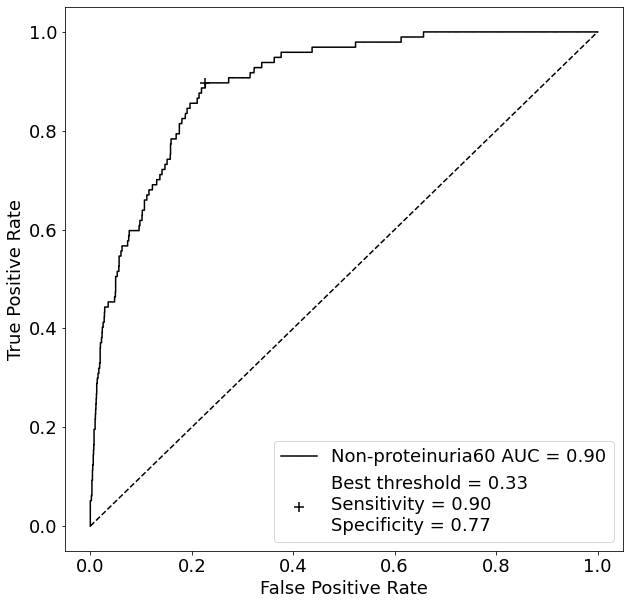

In [4]:
# model 60, non proteinuria

# model probabilities
y_prob60_non = model60.predict_proba(X_test60_features_non)[:,1]

# calculate roc curves
fpr60_non, tpr60_non, thresholds60_non = roc_curve(y_test60_non, y_prob60_non)
# get the best threshold
J60_non = tpr60_non - fpr60_non
ix60_non = argmax(J60_non)
best_thresh60_non = thresholds60_non[ix60_non]

print('eGFR<60, Non-proteinuria')
print('\nClassification Report\n')
print('Best Threshold=%.2f, sensitivity = %.2f, specificity = %.2f' % (best_thresh60_non, tpr60_non[ix60_non], 1-fpr60_non[ix60_non]))

y_prob_pred60_non = (y_prob60_non >= best_thresh60_non).astype(bool)
print(classification_report(y_test60_non, y_prob_pred60_non, target_names=['normal', 'abnormal']))

# plot roc and best threshold, eGFR < 60, non-proteinuria 
sens60_non, spec60_non = tpr60_non[ix60_non], 1-fpr60_non[ix60_non]
# plot the roc curve for the model
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 18
plt.plot([0,1], [0,1], linestyle='--', markersize=0.01, color='black')
plt.plot(fpr60_non, tpr60_non, marker='.', color='black', markersize=0.05, label="Non-proteinuria60 AUC = %.2f" % roc_auc_score(y_test60_non, y_prob60_non))
plt.scatter(fpr60_non[ix60_non], tpr60_non[ix60_non], marker='+', s=100, color='k', 
            label='Best threshold = %.2f \nSensitivity = %.2f \nSpecificity = %.2f' % (best_thresh60_non, sens60_non, spec60_non))

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)

# show the plot
plt.show()

eGFR<60, proteinuria

Classification Report

Best Threshold=0.74, sensitivity = 0.88, specificity = 0.73
              precision    recall  f1-score   support

      normal       0.95      0.73      0.82      1498
    abnormal       0.52      0.88      0.65       502

    accuracy                           0.77      2000
   macro avg       0.73      0.80      0.74      2000
weighted avg       0.84      0.77      0.78      2000



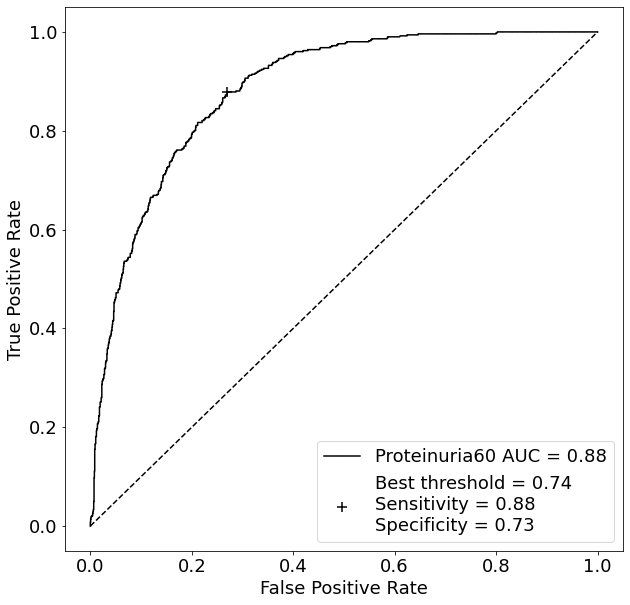

In [5]:
# model 60, proteinuria

# model probabilities
y_prob60_pro = model60.predict_proba(X_test60_features_pro)[:,1]

# calculate roc curves
fpr60_pro, tpr60_pro, thresholds60_pro = roc_curve(y_test60_pro, y_prob60_pro)
# get the best threshold
J60_pro = tpr60_pro - fpr60_pro
ix60_pro = argmax(J60_pro)
best_thresh60_pro = thresholds60_pro[ix60_pro]

print('eGFR<60, proteinuria')
print('\nClassification Report\n')
print('Best Threshold=%.2f, sensitivity = %.2f, specificity = %.2f' % (best_thresh60_pro, tpr60_pro[ix60_pro], 1-fpr60_pro[ix60_pro]))

y_prob_pred60_pro = (y_prob60_pro >= best_thresh60_pro).astype(bool)
print(classification_report(y_test60_pro, y_prob_pred60_pro, target_names=['normal', 'abnormal']))

# plot roc and best threshold, eGFR < 60, proteinuria 
sens60_pro, spec60_pro = tpr60_pro[ix60_pro], 1-fpr60_pro[ix60_pro]
# plot the roc curve for the model
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 18
plt.plot([0,1], [0,1], linestyle='--', markersize=0.01, color='black')
plt.plot(fpr60_pro, tpr60_pro, marker='.', color='black', markersize=0.05, label="Proteinuria60 AUC = %.2f" % roc_auc_score(y_test60_pro, y_prob60_pro))
plt.scatter(fpr60_pro[ix60_pro], tpr60_pro[ix60_pro], marker='+', s=100, color='k', 
            label='Best threshold = %.2f \nSensitivity = %.2f \nSpecificity = %.2f' % (best_thresh60_pro, sens60_pro, spec60_pro))

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)

# show the plot
plt.show()

eGFR<45, Non-proteinuria

Classification Report

Best Threshold=0.29, sensitivity = 1.00, specificity = 0.82
              precision    recall  f1-score   support

      normal       1.00      0.82      0.90      1971
    abnormal       0.08      1.00      0.14        29

    accuracy                           0.83      2000
   macro avg       0.54      0.91      0.52      2000
weighted avg       0.99      0.83      0.89      2000



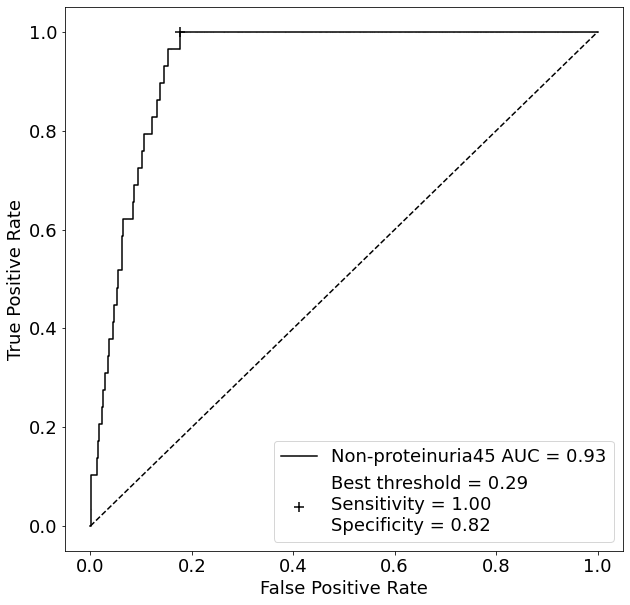

In [6]:
# model 45, non proteinuria

# model probabilities
y_prob45_non = model45.predict_proba(X_test45_features_non)[:,1]

# calculate roc curves
fpr45_non, tpr45_non, thresholds45_non = roc_curve(y_test45_non, y_prob45_non)
# get the best threshold
J45_non = tpr45_non - fpr45_non
ix45_non = argmax(J45_non)
best_thresh45_non = thresholds45_non[ix45_non]

print('eGFR<45, Non-proteinuria')
print('\nClassification Report\n')
print('Best Threshold=%.2f, sensitivity = %.2f, specificity = %.2f' % (best_thresh45_non, tpr45_non[ix45_non], 1-fpr45_non[ix45_non]))

y_prob_pred45_non = (y_prob45_non >= best_thresh45_non).astype(bool)
print(classification_report(y_test45_non, y_prob_pred45_non, target_names=['normal', 'abnormal']))

# plot roc and best threshold, eGFR < 45, non-proteinuria 
sens45_non, spec45_non = tpr45_non[ix45_non], 1-fpr45_non[ix45_non]
# plot the roc curve for the model
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 18
plt.plot([0,1], [0,1], linestyle='--', markersize=0.01, color='black')
plt.plot(fpr45_non, tpr45_non, marker='.', color='black', markersize=0.05, label="Non-proteinuria45 AUC = %.2f" % roc_auc_score(y_test45_non, y_prob45_non))
plt.scatter(fpr45_non[ix45_non], tpr45_non[ix45_non], marker='+', s=100, color='k', 
            label='Best threshold = %.2f \nSensitivity = %.2f \nSpecificity = %.2f' % (best_thresh45_non, sens45_non, spec45_non))

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)

# show the plot
plt.show()

eGFR<45, proteinuria

Classification Report

Best Threshold=0.83, sensitivity = 0.90, specificity = 0.75
              precision    recall  f1-score   support

      normal       0.97      0.75      0.84      1652
    abnormal       0.43      0.90      0.58       348

    accuracy                           0.77      2000
   macro avg       0.70      0.82      0.71      2000
weighted avg       0.88      0.77      0.80      2000



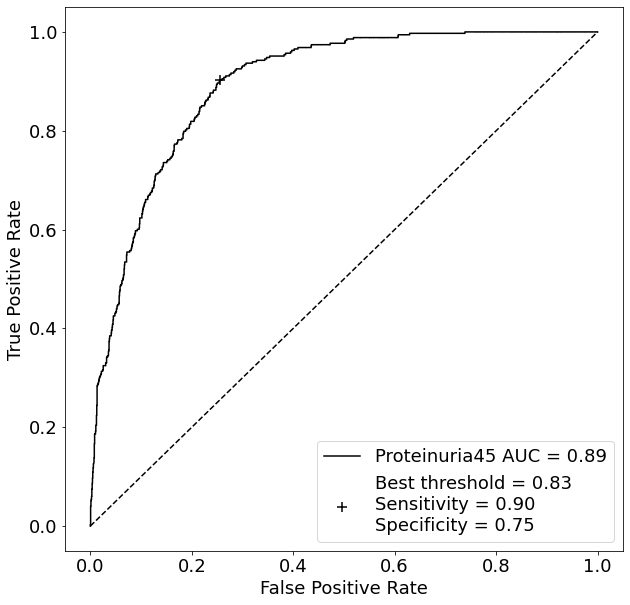

In [7]:
# model 45, proteinuria

# model probabilities
y_prob45_pro = model45.predict_proba(X_test45_features_pro)[:,1]

# calculate roc curves
fpr45_pro, tpr45_pro, thresholds45_pro = roc_curve(y_test45_pro, y_prob45_pro)
# get the best threshold
J45_pro = tpr45_pro - fpr45_pro
ix45_pro = argmax(J45_pro)
best_thresh45_pro = thresholds45_pro[ix45_pro]

print('eGFR<45, proteinuria')
print('\nClassification Report\n')
print('Best Threshold=%.2f, sensitivity = %.2f, specificity = %.2f' % (best_thresh45_pro, tpr45_pro[ix45_pro], 1-fpr45_pro[ix45_pro]))

y_prob_pred45_pro = (y_prob45_pro >= best_thresh45_pro).astype(bool)
print(classification_report(y_test45_pro, y_prob_pred45_pro, target_names=['normal', 'abnormal']))

# plot roc and best threshold, eGFR < 45, pro-proteinuria 
sens45_pro, spec45_pro = tpr45_pro[ix45_pro], 1-fpr45_pro[ix45_pro]
# plot the roc curve for the model
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 18
plt.plot([0,1], [0,1], linestyle='--', markersize=0.01, color='black')
plt.plot(fpr45_pro, tpr45_pro, marker='.', color='black', markersize=0.05, label="Proteinuria45 AUC = %.2f" % roc_auc_score(y_test45_pro, y_prob45_pro))
plt.scatter(fpr45_pro[ix45_pro], tpr45_pro[ix45_pro], marker='+', s=100, color='k', 
            label='Best threshold = %.2f \nSensitivity = %.2f \nSpecificity = %.2f' % (best_thresh45_pro, sens45_pro, spec45_pro))

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)

# show the plot
plt.show()

eGFR<30, Non-proteinuria

Classification Report

Best Threshold=0.24, sensitivity = 1.00, specificity = 0.84
              precision    recall  f1-score   support

      normal       1.00      0.84      0.92      1992
    abnormal       0.03      1.00      0.05         8

    accuracy                           0.85      2000
   macro avg       0.51      0.92      0.48      2000
weighted avg       1.00      0.85      0.91      2000



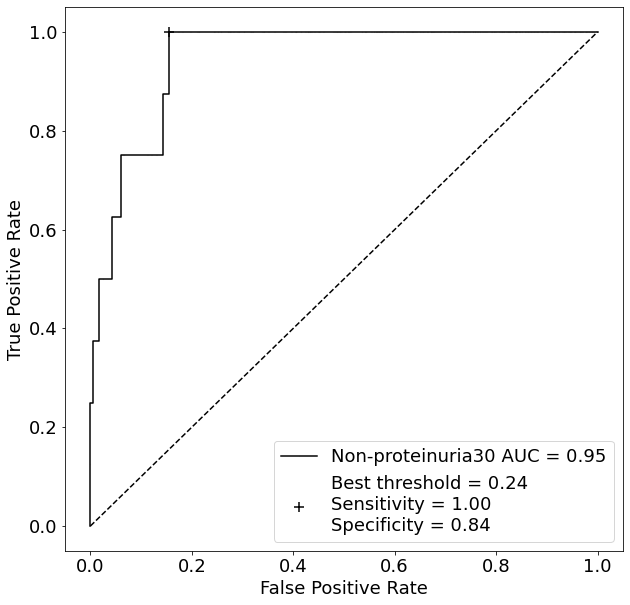

In [8]:
# model 30, non proteinuria

# model probabilities
y_prob30_non = model30.predict_proba(X_test30_features_non)[:,1]

# calculate roc curves
fpr30_non, tpr30_non, thresholds30_non = roc_curve(y_test30_non, y_prob30_non)
# get the best threshold
J30_non = tpr30_non - fpr30_non
ix30_non = argmax(J30_non)
best_thresh30_non = thresholds30_non[ix30_non]

print('eGFR<30, Non-proteinuria')
print('\nClassification Report\n')
print('Best Threshold=%.2f, sensitivity = %.2f, specificity = %.2f' % (best_thresh30_non, tpr30_non[ix30_non], 1-fpr30_non[ix30_non]))

y_prob_pred30_non = (y_prob30_non >= best_thresh30_non).astype(bool)
print(classification_report(y_test30_non, y_prob_pred30_non, target_names=['normal', 'abnormal']))

# plot roc and best threshold, eGFR < 30, non-proteinuria 
sens30_non, spec30_non = tpr30_non[ix30_non], 1-fpr30_non[ix30_non]
# plot the roc curve for the model
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 18
plt.plot([0,1], [0,1], linestyle='--', markersize=0.01, color='black')
plt.plot(fpr30_non, tpr30_non, marker='.', color='black', markersize=0.05, label="Non-proteinuria30 AUC = %.2f" % roc_auc_score(y_test30_non, y_prob30_non))
plt.scatter(fpr30_non[ix30_non], tpr30_non[ix30_non], marker='+', s=100, color='k', 
            label='Best threshold = %.2f \nSensitivity = %.2f \nSpecificity = %.2f' % (best_thresh30_non, sens30_non, spec30_non))

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)

# show the plot
plt.show()

eGFR<30, proteinuria

Classification Report

Best Threshold=0.88, sensitivity = 0.85, specificity = 0.80
              precision    recall  f1-score   support

      normal       0.98      0.80      0.88      1761
    abnormal       0.37      0.85      0.52       239

    accuracy                           0.81      2000
   macro avg       0.67      0.83      0.70      2000
weighted avg       0.90      0.81      0.84      2000



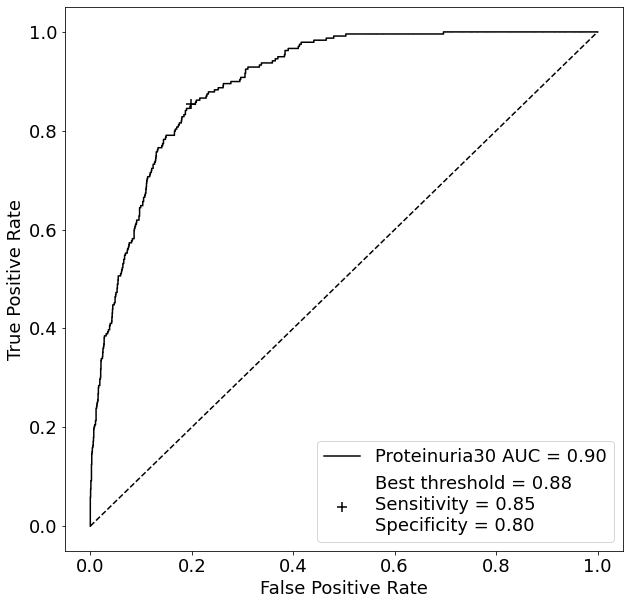

In [9]:
# model 30, proteinuria

# model probabilities
y_prob30_pro = model30.predict_proba(X_test30_features_pro)[:,1]

# calculate roc curves
fpr30_pro, tpr30_pro, thresholds30_pro = roc_curve(y_test30_pro, y_prob30_pro)
# get the best threshold
J30_pro = tpr30_pro - fpr30_pro
ix30_pro = argmax(J30_pro)
best_thresh30_pro = thresholds30_pro[ix30_pro]

print('eGFR<30, proteinuria')
print('\nClassification Report\n')
print('Best Threshold=%.2f, sensitivity = %.2f, specificity = %.2f' % (best_thresh30_pro, tpr30_pro[ix30_pro], 1-fpr30_pro[ix30_pro]))

y_prob_pred30_pro = (y_prob30_pro >= best_thresh30_pro).astype(bool)
print(classification_report(y_test30_pro, y_prob_pred30_pro, target_names=['normal', 'abnormal']))

# plot roc and best threshold, eGFR < 30, pro-proteinuria 
sens30_pro, spec30_pro = tpr30_pro[ix30_pro], 1-fpr30_pro[ix30_pro]
# plot the roc curve for the model
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 18
plt.plot([0,1], [0,1], linestyle='--', markersize=0.01, color='black')
plt.plot(fpr30_pro, tpr30_pro, marker='.', color='black', markersize=0.05, label="Proteinuria30 AUC = %.2f" % roc_auc_score(y_test30_pro, y_prob30_pro))
plt.scatter(fpr30_pro[ix30_pro], tpr30_pro[ix30_pro], marker='+', s=100, color='k', 
            label='Best threshold = %.2f \nSensitivity = %.2f \nSpecificity = %.2f' % (best_thresh30_pro, sens30_pro, spec30_pro))

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)

# show the plot
plt.show()

## bootstrap CI

### make a dataframe for bootstrap, eGFR60 model & non-proteinuria group

In [10]:
# make a dataframe for bootstrap, eGFR60 model & non-proteinuria group

df_bs = pd.DataFrame({
    "eGFR_ab60_non"  : y_test60_non,
    "prob60_non"     : y_prob60_non,
    "eGFR_ab60_pro"   : y_test60_pro,
    "prob60_pro"      : y_prob60_pro
})
df_bs.head()

,eGFR_ab60_non,prob60_non,eGFR_ab60_pro,prob60_pro
0,0,0.111303,1,0.540327
1,0,0.128397,1,0.915360
2,0,0.433777,0,0.945997
3,0,0.048262,1,0.727768
4,0,0.104928,0,0.348109


### bootstrap and obtain AUC, threshold, sensitivity, specificity

In [11]:
# load dataset
data = df_bs

# configure bootstrap
n_iterations = 10000
n_size = len(data)

# run bootstrap
auc_box_ev_np = []
th_box_ev_np = []
se_box_ev_np = []
sp_box_ev_np = []

for i in range(n_iterations):
    boot = resample(data, n_samples=n_size, replace=True, stratify=data['eGFR_ab60_non'])
    auc_ev_np = roc_auc_score(boot['eGFR_ab60_non'], boot['prob60_non'])
    
    auc_box_ev_np.append(auc_ev_np)
    
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(boot['eGFR_ab60_non'], boot['prob60_non'])
    J = tpr - fpr
    ix = argmax(J)
    best_thresh, se, sp = thresholds[ix], tpr[ix], 1-fpr[ix]
    
    th_box_ev_np.append(best_thresh)
    se_box_ev_np.append(se)
    sp_box_ev_np.append(sp)

### density plot and mean, median, 95% confidence interval

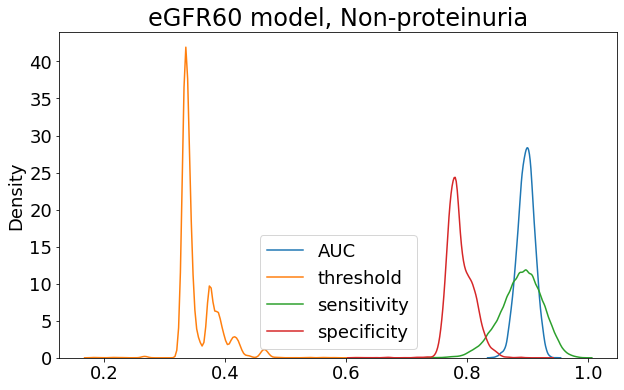

auc mean:0.897, median:0.898, CI 0.869 - 0.923
th mean:0.354, median:0.338, CI 0.333 - 0.426
se mean:0.889, median:0.887, CI 0.814 - 0.948
sp mean:0.788, median:0.784, CI 0.758 - 0.834


In [12]:
# Kernel Density Estimate Plot  
plt.rcParams['figure.figsize'] = [10, 6] 
sns.kdeplot(auc_box_ev_np, label='AUC') 
sns.kdeplot(th_box_ev_np, label='threshold')
sns.kdeplot(se_box_ev_np, label='sensitivity')
sns.kdeplot(sp_box_ev_np, label='specificity')
plt.title("eGFR60 model, Non-proteinuria", fontsize=24)
plt.legend()
plt.show()

# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_auc = max(0.0, np.percentile(auc_box_ev_np, p))
p = (alpha+((1.0-alpha)/2.0)) *100
upper_auc = min(1.0, np.percentile(auc_box_ev_np, p))
print('auc mean:%.3f, median:%.3f, CI %.3f - %.3f' % (mean(auc_box_ev_np), np.median(auc_box_ev_np), lower_auc, upper_auc))

p = ((1.0-alpha)/2.0) * 100
lower_th = max(0.0, np.percentile(th_box_ev_np, p))
p = (alpha+((1.0-alpha)/2.0)) *100
upper_th = min(1.0, np.percentile(th_box_ev_np, p))
print('th mean:%.3f, median:%.3f, CI %.3f - %.3f' % (mean(th_box_ev_np), np.median(th_box_ev_np), lower_th, upper_th))

p = ((1.0-alpha)/2.0) * 100
lower_se = max(0.0, np.percentile(se_box_ev_np, p))
p = (alpha+((1.0-alpha)/2.0)) *100
upper_se = min(1.0, np.percentile(se_box_ev_np, p))
print('se mean:%.3f, median:%.3f, CI %.3f - %.3f' % (mean(se_box_ev_np), np.median(se_box_ev_np), lower_se, upper_se))

p = ((1.0-alpha)/2.0) * 100
lower_sp = max(0.0, np.percentile(sp_box_ev_np, p))
p = (alpha+((1.0-alpha)/2.0)) *100
upper_sp = min(1.0, np.percentile(sp_box_ev_np, p))
print('sp mean:%.3f, median:%.3f, CI %.3f - %.3f' % (mean(sp_box_ev_np), np.median(sp_box_ev_np), lower_sp, upper_sp))

## bootstrap CI, p value, two sample

In [13]:
def pvalue_stat2(
    y_true1,
    y_preds1,
    y_true2,
    y_preds2,
    score_fun,
    stat_fun=np.mean,
    n_bootstraps=10000,
    two_tailed=True,
    seed=None,
    reject_one_class_samples=True,
):
    """
    Compute p-value for hypothesis that given statistic of score function for model I predictions is higher than for
    model II predictions using bootstrapping.
    :param y_true: 1D list or array of labels.
    :param y_preds1: A list of lists or 2D array of predictions for model I corresponding to elements in y_true.
    :param y_preds2: A list of lists or 2D array of predictions for model II corresponding to elements in y_true.
    :param score_fun: Score function for which confidence interval is computed. (e.g. sklearn.metrics.accuracy_score)
    :param stat_fun: Statistic for which p-value is computed. (e.g. np.mean)
    :param n_bootstraps: The number of bootstraps. (default: 2000)
    :param two_tailed: Whether to use two-tailed test. (default: True)
    :param seed: Random seed for reproducibility. (default: None)
    :param reject_one_class_samples: Whether to reject bootstrapped samples with only one label. For scores like AUC we
    need at least one positive and one negative sample. (default: True)
    :return: Computed p-value, array of bootstrapped differences of scores.
    """

    y_true1 = np.array(y_true1)
    y_preds1 = np.atleast_2d(y_preds1)
    y_true2 = np.array(y_true2)
    y_preds2 = np.atleast_2d(y_preds2)
    assert all(len(y_true1) == len(y) for y in y_preds1)
    assert all(len(y_true2) == len(y) for y in y_preds2)

    np.random.seed(seed)
    z1 = []
    z2 = []
    score1_box = []
    score2_box = []
    for i in range(n_bootstraps):

        readers1 = np.random.randint(0, len(y_preds1), len(y_preds1))
        indices1 = np.random.randint(0, len(y_true1), len(y_true1))
        readers2 = np.random.randint(0, len(y_preds2), len(y_preds2))
        indices2 = np.random.randint(0, len(y_true2), len(y_true2))
        if reject_one_class_samples and len(np.unique(y_true1[indices1])) < 2 | len(np.unique(y_true2[indices2])) < 2:
            continue
        reader_scores1 = []
        for r in readers1:
            reader_scores1.append(roc_auc_score(y_true1[indices1], y_preds1[r][indices1]))
        score1 = stat_fun(reader_scores1)
        reader_scores2 = []
        for r in readers2:
            reader_scores2.append(roc_auc_score(y_true2[indices2], y_preds2[r][indices2]))
        score2 = stat_fun(reader_scores2)
        z1.append(score1 - score2)
        z2.append(score2 - score1)
        score1_box.append(score1)
        score2_box.append(score2)
        
    mean_score1 = np.mean(score1_box)
    sorted_scores1 = np.array(sorted(score1_box))
    alpha = (1.0 - 0.95) / 2.0
    ci_lower1 = sorted_scores1[int(round(alpha * len(sorted_scores1)))]
    ci_upper1 = sorted_scores1[int(round((1.0 - alpha) * len(sorted_scores1)))]
    print("score1 mean:%.3f, CI:%.3f-%.3f" %  (mean_score1, ci_lower1, ci_upper1))
    mean_score2 = np.mean(score2_box)
    sorted_scores2 = np.array(sorted(score2_box))
    alpha = (1.0 - 0.95) / 2.0
    ci_lower2 = sorted_scores2[int(round(alpha * len(sorted_scores2)))]
    ci_upper2 = sorted_scores2[int(round((1.0 - alpha) * len(sorted_scores2)))]
    print("score2 mean:%.3f, CI:%.3f-%.3f" %  (mean_score2, ci_lower2, ci_upper2))
    
    if mean_score1 > mean_score2:
        z=z1
    else:
        z=z2
        
    p = percentileofscore(z, 0.0, kind="weak") / 100.0
    if two_tailed:
        p *= 2.0
    return p, z

def pvalue2(
    y_true1,
    y_pred1,
    y_true2,
    y_pred2,
    score_fun,
    n_bootstraps=10000,
    two_tailed=True,
    seed=None,
    reject_one_class_samples=True,
):
    """
    Compute p-value for hypothesis that score function for model I predictions is higher than for model II predictions
    using bootstrapping.
    :param y_true: 1D list or array of labels.
    :param y_pred1: 1D list or array of predictions for model I corresponding to elements in y_true.
    :param y_pred2: 1D list or array of predictions for model II corresponding to elements in y_true.
    :param score_fun: Score function for which confidence interval is computed. (e.g. sklearn.metrics.accuracy_score)
    :param n_bootstraps: The number of bootstraps. (default: 2000)
    :param two_tailed: Whether to use two-tailed test. (default: True)
    :param seed: Random seed for reproducibility. (default: None)
    :param reject_one_class_samples: Whether to reject bootstrapped samples with only one label. For scores like AUC we
    need at least one positive and one negative sample. (default: True)
    :return: Computed p-value, array of bootstrapped differences of scores.
    """

    assert len(y_true1) == len(y_pred1)
    assert len(y_true2) == len(y_pred2)

    return pvalue_stat2(
        y_true1=y_true1,
        y_preds1=y_pred1,
        y_true2=y_true2,
        y_preds2=y_pred2,
        score_fun=score_fun,
        n_bootstraps=n_bootstraps,
        two_tailed=two_tailed,
        seed=seed,
        reject_one_class_samples=reject_one_class_samples,
    )
# %%

# refrence : https://github.com/mateuszbuda/ml-stat-util

### p value of AUC, non-proteinuria vs proteinuria in eGFR60 model

In [14]:
# non-proteinuria vs proteinuria
p, z = pvalue2(y_true1 = df_bs['eGFR_ab60_non'], y_pred1 = df_bs['prob60_non'], 
               y_true2 = df_bs['eGFR_ab60_pro'], y_pred2 = df_bs['prob60_pro'],
               n_bootstraps=10000,
               score_fun=roc_auc_score, seed=42)
print("P value={}".format(p))

score1 mean:0.897, CI:0.868-0.923
score2 mean:0.883, CI:0.868-0.898
P value=0.396
